In [1]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
#displaying the dataset
da=pd.read_csv("sales_channel.csv")
da

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
da.shape

(200, 5)

In [5]:
da.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# About the columns:

1. TV : This column includes all the sales generated through TV as a medium.

2. Radio : This column includes all the sales generated through Radio as a medium.

3. Newspaper : this column includes all the sales generated through newspapers as medium

4. Sales : This column tells us about the total sales generated from all the sales channel.

In [6]:
da.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

Describing the dataset:

In [7]:

da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
da.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Data Cleaning and Outlier analysis :

In [9]:
da.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no null values present in the dataset, which means the data is clean

Outlier Analysis :

Unnamed: 0       AxesSubplot(0.125,0.536818;0.133621x0.343182)
TV            AxesSubplot(0.285345,0.536818;0.133621x0.343182)
radio          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
newspaper     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
sales         AxesSubplot(0.766379,0.536818;0.133621x0.343182)
dtype: object

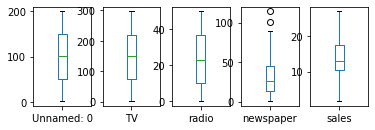

In [10]:
da.plot(kind="box", subplots=True, layout=(2,5))

From the above, boxplots we can see that there are a few outliers present in the newspaper column.

Univariate Analysis : 

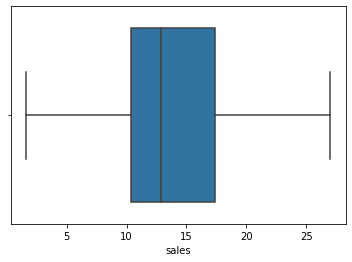

In [11]:
sns.boxplot(da['sales'])
plt.show()

Scatter Plot showing how target variable is Sales is related to other variables.

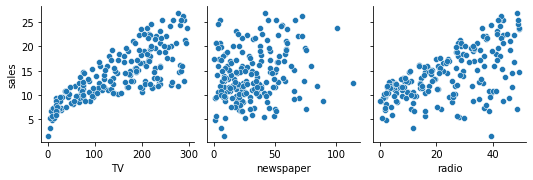

In [12]:
sns.pairplot(da, x_vars=['TV','newspaper','radio'],y_vars=['sales'],kind='scatter')
plt.show()

From, the above scatterplot, it can be observed that Tv dataset seems to be more linear as compared to other variable dispersion of values. Let us observe now by correlation values by generating a heat map.

Heatmap showing correlation between different variables:

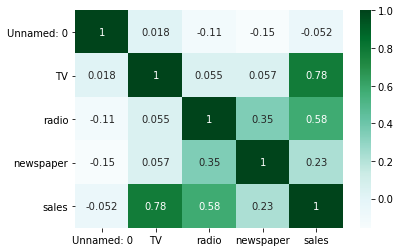

In [13]:
sns.heatmap(da.corr(), cmap="BuGn", annot=True)
plt.show()

As seen from the pairplot and the heatmap, the correlation factor for Tv variable is 0.78, higher than radio and newspaper, which means that it is highly correlated with sales. 

Building simple Linear Regression model :

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [15]:
x=da.iloc[:,0:-1]   
x.head()

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [16]:
y=da.iloc[:,-1]   
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [17]:
x.shape

(200, 4)

In [18]:
y.shape

(200,)

Applying Variance Inflation Factor :

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print (vif)

In [21]:
vif_calc()

   VIF Factor    Features
0    2.609076  Unnamed: 0
1    3.106114          TV
2    3.450875       radio
3    3.086776   newspaper


VIF indicates that no column is that much away from the desired result and can be used in predicting the total sales.

In [22]:
scale=StandardScaler()  #standardizes features by removing the mean and scaling to unit variance
x=scale.fit_transform(x)
x

array([[-1.72341210e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00],
       [-1.70609137e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01],
       [-1.68877065e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00],
       [-1.67144992e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00],
       [-1.65412920e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00],
       [-1.63680847e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00],
       [-1.61948775e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01],
       [-1.60216702e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01],
       [-1.58484630e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00],
       [-1.56752558e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01],
       [-1.55020485e+00, -9.45155670e-01, -1.17923146e+00,
        -2.92486143e-01],
       [-1.53288413e+00,  7.90028350e-01,  4.96973404e-02,
      

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=33,random_state=42)

In [24]:
x_train.shape

(167, 4)

In [25]:
y_train.shape

(167,)

In [26]:
x_test.shape

(33, 4)

In [27]:
y_test.shape

(33,)

In [28]:
lm=LinearRegression()

In [29]:
lm.fit(x_train,y_train)

LinearRegression()

In [30]:
lm.coef_

array([0.01339432, 3.84448052, 2.75386055, 0.0112222 ])

In [31]:
lm.intercept_

14.012877617881355

In [32]:
da.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [33]:
lm.score(x_train,y_train)

0.8935426443621624

In [34]:
pred=lm.predict(x_test)  #x_test will be sent for testing
print("Predicted sales:", pred)
print("Actual sales:", y_test)

Predicted sales: [16.30328422 20.71954488 21.48749902 10.49390425 22.07962154 12.98061965
 20.97286372  7.49764264 13.71033848 15.11820024  9.05200894  6.68748368
 14.28847666  8.87238088  9.75685294 12.19729512  8.63439047 16.29290714
 10.2380352  18.83944096 19.42299985 12.95913055 12.28726099 21.15649705
  7.88949555  5.8456683  20.66425566 12.01758063  9.19823197  8.51374615
 12.51293395  9.9792036  21.20572871]
Actual sales: 95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
Name: sales, dtype: float64


In [35]:
print("error:")
print("Mean Absolute Error:", mean_absolute_error(y_test,pred))
print("Mean Squared Error:", mean_squared_error(y_test,pred))    # to check model accuracy
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean Absolute Error: 1.4071766440415205
Mean Squared Error: 2.9418914388030837
Root Mean Squared Error: 1.7151942860221647


Predicting r2 score for the data

In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9099827879887722


In [37]:
from sklearn.model_selection import cross_val_score

Applying Cross-Validation to the model :

In [38]:
lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=3)
scores  

array([0.80496884, 0.90678535, 0.87523087])